In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
ssmodel = StandardScaler()
price_scaled_data = ssmodel.fit_transform(market_data_df[['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y']])
price_scaled_data

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [5]:
# Create a DataFrame with the scaled data

# Copy the crypto names from the original data
#scaled_data = market_data_df.copy()
price_scaled_df = pd.DataFrame(price_scaled_data, 
    columns=['price_change_percentage_24h', 'price_change_percentage_7d', 
             'price_change_percentage_14d', 'price_change_percentage_30d', 
             'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y'])

price_scaled_df['coinid'] = market_data_df.index

# Set the coinid column as index
price_scaled_df.set_index('coinid', inplace=True)
# Display sample data
price_scaled_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coinid,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

k_values = list(range(1, 11))


# Create an empty list to store the inertia values
kmodel_inertia  = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k_value in k_values:
    kmodel = KMeans(n_clusters = k_value, random_state=2)
    kmodel.fit(price_scaled_df)
    kmodel_inertia.append(kmodel.inertia_)

# Create a dictionary with the data to plot the Elbow curve

elbow_dic={'kvalue' : k_values, 'inertia' :  kmodel_inertia}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_dic)

# Display the DataFrame
elbow_df

c:\Users\deepa\.conda\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\deepa\.conda\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\deepa\.conda\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\deepa\.conda\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have

,kvalue,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,55.763391
6,7,44.237520
7,8,41.068743
8,9,36.933822
9,10,29.836181


<Axes: xlabel='kvalue'>

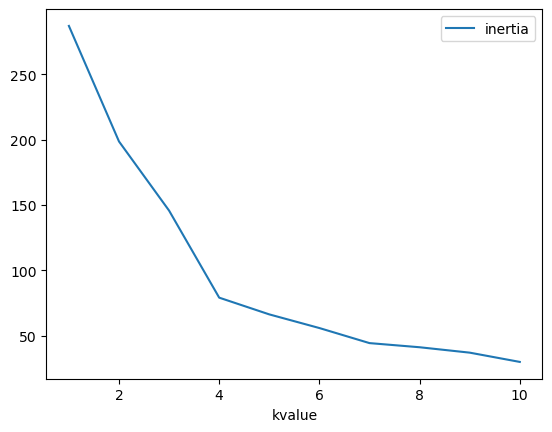

In [7]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(x='kvalue', y='inertia')

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best value for k is 5

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [8]:
# Initialize the K-Means model using the best value for k 
best_k = 5
kmodel = KMeans(n_clusters=best_k, random_state=2)



In [9]:
# Fit the K-Means model using the scaled data
kmodel.fit(price_scaled_df)

c:\Users\deepa\.conda\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=2)

In [10]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predict_prices_cluster = kmodel.predict(price_scaled_df)


# View the resulting array of cluster values.
predict_prices_cluster

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [11]:
# Create a copy of the DataFrame
predicted_df = price_scaled_df.copy()


In [12]:
# Add a new column to the DataFrame with the predicted clusters
predicted_df['predicted_clusters'] = predict_prices_cluster

# Display sample data
predicted_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_clusters
coinid,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

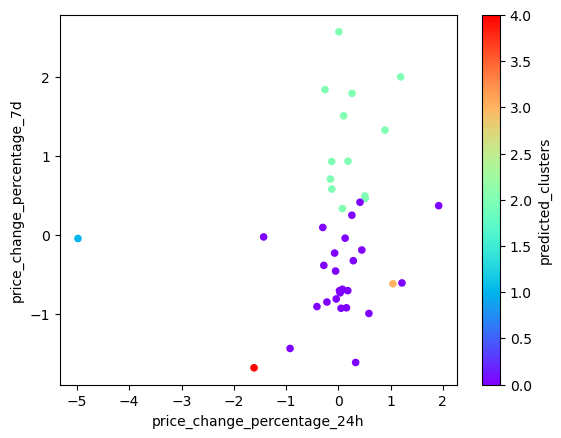

In [13]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

predicted_df.plot.scatter(x="price_change_percentage_24h",  y="price_change_percentage_7d", c="predicted_clusters",  colormap="rainbow")


### Optimize Clusters with Principal Component Analysis.

In [14]:
# Create a PCA model instance and set `n_components=3`.
pcamodel = PCA(n_components=3)


In [15]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
transform_data_array = pcamodel.fit_transform(price_scaled_df)

# View the first five rows of the DataFrame. 
transform_data_array[0:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [16]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pcamodel.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [17]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data

transform_pca_df = pd.DataFrame(transform_data_array,  columns=['PCA1','PCA2','PCA3'])



# Copy the crypto names from the original data
transform_pca_df['coin_id'] = market_data_df.index

# Set the coinid column as index
transform_pca_df.set_index('coin_id',  inplace=True)


# Display sample data
transform_pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [18]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

ncluster_list = list(range(1, 11))

# Create an empty list to store the inertia values
pcamodel_inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for ncluster in ncluster_list:
    kmeans = KMeans(n_clusters=ncluster, random_state=2)
    kmeans.fit(transform_pca_df)
    pcamodel_inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_pca_dic = {
    'k': ncluster_list,
    'inertia': pcamodel_inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_pca_df =  pd.DataFrame(elbow_pca_dic)


# Display the DataFrame
elbow_pca_df.head()

c:\Users\deepa\.conda\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\deepa\.conda\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\deepa\.conda\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\deepa\.conda\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,38.584870


<Axes: xlabel='k'>

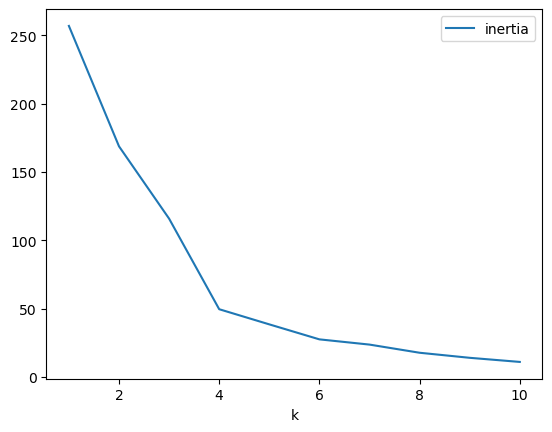

In [19]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_pca_df.plot.line(x='k', y='inertia')

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** best value for k is 5 when using the PCA data


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No,  the best value for k is the same (5) when using the original data and the PCA data

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [20]:
# Initialize the K-Means model using the best value for k
k_pca_best = 5
pca_kmean_model = KMeans(n_clusters=k_pca_best)


In [21]:
# Fit the K-Means model using the PCA data
pca_kmean_model.fit(transform_pca_df)


c:\Users\deepa\.conda\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [22]:
# Predict the clusters to group the cryptocurrencies using the PCA data
transform_pca_array = pca_kmean_model.predict(transform_pca_df)

# Print the resulting array of cluster values.
transform_pca_array

array([0, 0, 4, 4, 0, 0, 0, 0, 0, 4, 1, 4, 4, 0, 4, 4, 1, 4, 0, 4, 1, 0,
       1, 4, 4, 4, 4, 1, 0, 1, 4, 4, 2, 4, 1, 4, 3, 1, 4, 4, 4])

In [23]:
# Create a copy of the DataFrame with the PCA data
pca_copy_df = transform_pca_df.copy()


# Add a new column to the DataFrame with the predicted clusters
pca_copy_df['crypto_cluster'] = transform_pca_array

# Display sample data
pca_copy_df

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,4
ripple,-0.471835,-0.222660,-0.479053,4
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0


<Axes: xlabel='PCA1', ylabel='PCA2'>

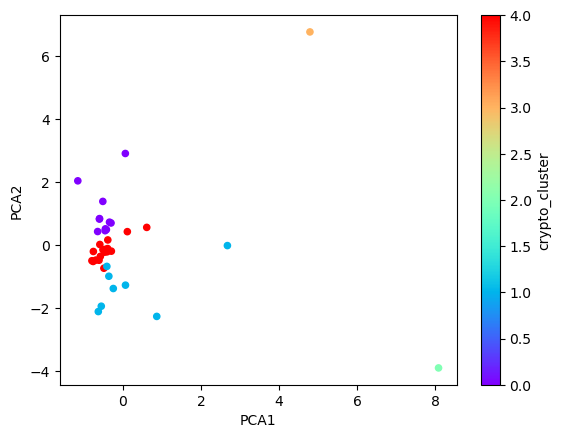

In [24]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_copy_df.plot.scatter(x="PCA1", y='PCA2', c='crypto_cluster', colormap="rainbow")

### Determine the Weights of Each Feature on each Principal Component

In [25]:
# Use the columns from the original scaled DataFrame as the index.
price_scaled_df.index = [x for x in range(0, len(price_scaled_df))]
pca_copy_df.index = [x for x in range(0, len(pca_copy_df))]

df_weight_feature = pd.concat([pca_copy_df, price_scaled_df],  axis=1)
df_weight_feature.sort_values('PCA1', ascending=False).head(5)

,PCA1,PCA2,PCA3,crypto_cluster,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
32,8.089018,-3.896891,2.301382,2,-4.981042,-0.045178,-1.206956,-1.212126,0.047736,4.632380,6.088625
36,4.792395,6.767679,-1.986985,3,1.045530,-0.618328,2.907054,5.351455,4.769913,3.148875,1.348488
29,2.676868,-0.013954,-1.965207,1,-1.612188,-1.682027,-0.816921,1.148607,1.712641,1.502992,0.286977
34,0.865762,-2.261882,0.275583,1,-1.428574,-0.025510,-1.628859,-0.860354,-0.840714,0.898815,0.268647
24,0.608974,0.563532,-1.148742,4,-0.217984,-0.849381,0.297632,-0.199820,1.773127,-0.047361,-0.119226


In [26]:
df_weight_feature.sort_values('PCA2', ascending=False).head(5)

,PCA1,PCA2,PCA3,crypto_cluster,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
36,4.792395,6.767679,-1.986985,3,1.045530,-0.618328,2.907054,5.351455,4.769913,3.148875,1.348488
13,0.060499,2.909404,1.498571,0,0.262723,1.792602,2.202665,1.437842,0.893865,-0.155893,-0.167644
4,-1.157800,2.041209,1.859715,0,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
5,-0.516534,1.388377,0.804071,0,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
0,-0.600667,0.842760,0.461595,0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    - For PCA1, price_change_percentage_1y and price_change_percentage_200d has positive influence
    - For  PCA2, price_change_percentage_30d and price_change_percentage_60d has positive influence

In [27]:
print('''
For PCA1, price_change_percentage_1y and price_change_percentage_200d has positive influence \n
For PCA2, price_change_percentage_30d and price_change_percentage_60d has positive influence
''')


For PCA1, price_change_percentage_1y and price_change_percentage_200d has positive influence 

For PCA2, price_change_percentage_30d and price_change_percentage_60d has positive influence

